In [33]:
# imports básicos
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pydotplus
from IPython.display import Image

In [34]:
df = pd.read_csv('weather.csv')

In [35]:
#visualizar o dataset
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [36]:
#transformando para binário (variáveis eram categóricas(texto), precisamos de números)
data_conv = pd.get_dummies(df[ ['outlook', 'temperature', 'humidity', 'windy'] ])

In [44]:
data_conv

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal
0,False,1,0,0,0,1,0,1,0
1,True,1,0,0,1,0,0,0,1
2,True,1,0,0,0,0,1,1,0
3,False,1,0,0,0,1,0,0,1
4,False,0,1,0,0,0,1,1,0
5,False,0,1,0,1,0,0,0,1
6,True,0,1,0,1,0,0,0,1
7,False,0,1,0,0,0,1,0,1
8,True,0,1,0,0,0,1,1,0
9,False,0,0,1,0,1,0,1,0


In [38]:
# Definimos a árvore de decisão
classifier = tree.DecisionTreeClassifier()
# construimos a árvore a partir do dataset
classifier_train = classifier.fit(data_conv, df['play'])

In [46]:
# Testando o modelo treinado
prediction = classifier_train.predict([[0,0,0,1,1,0,0,1,1]])


In [48]:
#imprimindo a decisão dessa amostra testada
print(prediction)

['yes']


In [52]:
#Podemos exportar os dados do classificador para verificar a árvore criada
tree.export_graphviz(classifier_train, None)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[1] <= 0.5\\ngini = 0.459\\nsamples = 14\\nvalue = [5, 9]"] ;\n1 [label="X[8] <= 0.5\\ngini = 0.5\\nsamples = 10\\nvalue = [5, 5]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 0.5\\ngini = 0.32\\nsamples = 5\\nvalue = [4, 1]"] ;\n1 -> 2 ;\n3 [label="X[0] <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n2 -> 6 ;\n7 [label="X[0] <= 0.5\\ngini = 0.32\\nsamples = 5\\nvalue = [1, 4]"] ;\n1 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n7 -> 8 ;\n9 [label="X[4] <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n9 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n9 -> 11 ;\n12 [label="gini = 0.0\

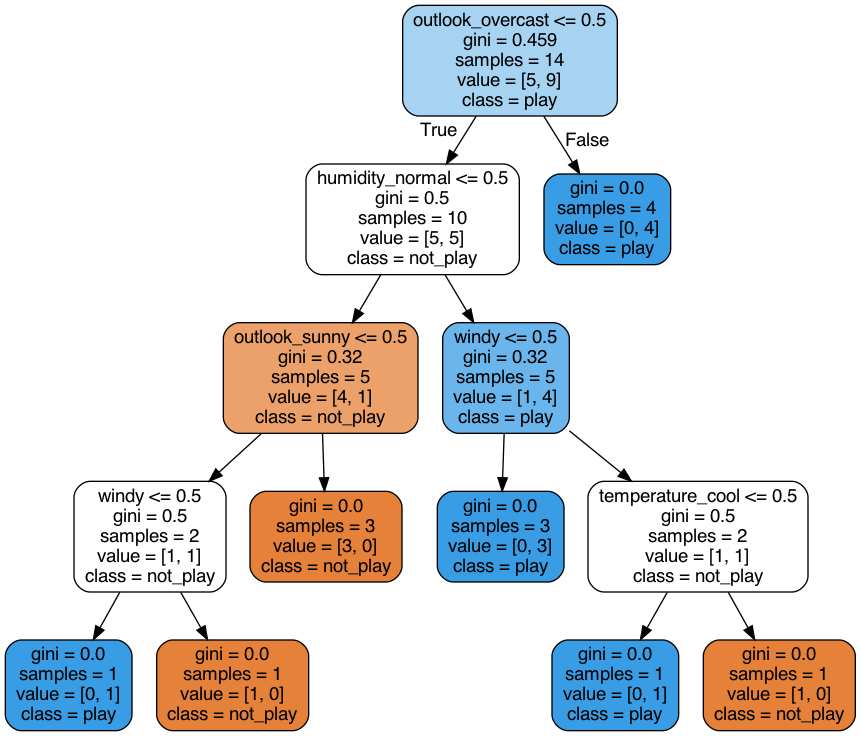

In [51]:
#Create Dot Data
#veja a instalação do graphviz conforme o seu SO
dot_data = tree.export_graphviz(classifier_train, out_file=None, feature_names=list(data_conv.columns.values), 
                                class_names=['not_play', 'play'], rounded=True, filled=True) 
#Criar gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostra resultado
Image(graph.create_png())